In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import matplotlib

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16


%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
f_root = TFile("Files/SelectionII_ccpi0_dQdx_v9.root") 
name_v = ['All','Cosmic','CC 1-$\\pi^0$','CC 0-$\\pi^0$','NC $\\pi^0$','NC 0-$\\pi^0$','Other']
label_v = ['All','Cosmic','CC1pi0','CC0pi0','NC1pi0','NC0pi0','Other']
color_v = ['blue','purple','yellow','lime','green','lightskyblue','salmon'] 

In [3]:
def make2DHist(hist,xlabel,ylabel,var1,var2,xmin,xmax,ymin,ymax,mult='Mult = 1',nbins=100,\
               x00=0,x01=0,y00=0,y01=0,x10=0,x11=0,y10=0,y11=0,a_v=[],t_v=[]):
   
    for n in xrange(0,len(name_v)):
    
        hist_name = hist + str(n)
        h = f_root.Get(hist_name) 
   
        h_v, edges = rn.hist2array(h,return_edges=True)
         
        binsx = (edges[0][:-1] + edges[0][1:])/2
        binsy = (edges[1][:-1] + edges[1][1:])/2

        x, y = binsx, binsy
        display = np.zeros([len(y),len(x)])

        y_new = []; x_new = []
    
        for i in xrange(binsx.shape[0]):
            for j in xrange(binsy.shape[0]):
                k = h_v[i][j]
                while k > 0:
                    y_new.append(binsy[j])
                    x_new.append(binsx[i])
            
                    k -= 1
        
        x = np.linspace(0,9,9)
        
        H, xedges, yedges = np.histogram2d(y_new,x_new,bins=nbins,range=((ymin,ymax),(xmin,xmax)))
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

        fig = plt.figure(figsize=(8,6))
        plt.pcolormesh(yedges,xedges,Hmasked)
        plt.grid(True)
        plt.colorbar()
        plt.title("Track %s, %s"%(mult,name_v[n]),fontsize=20,weight='bold')
        plt.xlabel(xlabel,fontsize=16,weight='bold')
        plt.ylabel(ylabel,fontsize=16,weight='bold')
        if (x01 != 0):
            plt.plot((x00, x01), (y00, y01), '-',color='fuchsia',lw=4)
            plt.plot((x10, x11), (y10, y11), '-',color='fuchsia',lw=4)
        
        if ( var1 == 'mult2_dedx' ):
            plt.plot((2.5,4.0),(2.5,4.0),'-',color='fuchsia',lw=4)
            
        ax0 = a_v[0]; ax1 = a_v[1]; ay0 = a_v[2]; ay1 = a_v[3];
        tx = t_v[0]; ty = t_v[1]

        ax = plt.axes()
        ax.arrow(ax0, ay0, ax1, ay1, head_width=a_v[4], head_length=a_v[5], fc='fuchsia',ec='fuchsia',lw=2)
        plt.text(tx, ty, 'Cut',fontsize=18,weight='bold',color='fuchsia')

        plt.savefig('Plots/CutJustify_sel2_%s_v_%s_%s.png' % (var1,var2,label_v[n]))

## Now add data plots

In [6]:
f_root = TFile("Files/SelectionII_ccpi0_dQdx_v9.root") 

stage='sel2_data'
name_v = ['OnBeam']
label_v = ['OnBeam']
color_v = ['black'] 

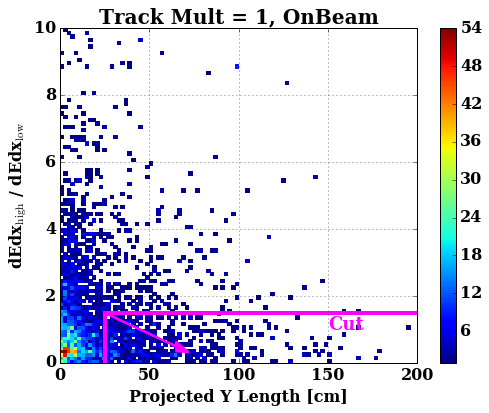

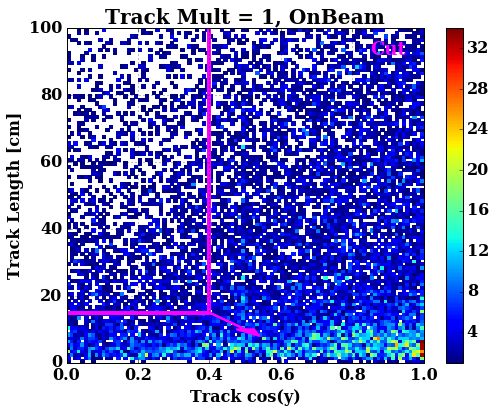

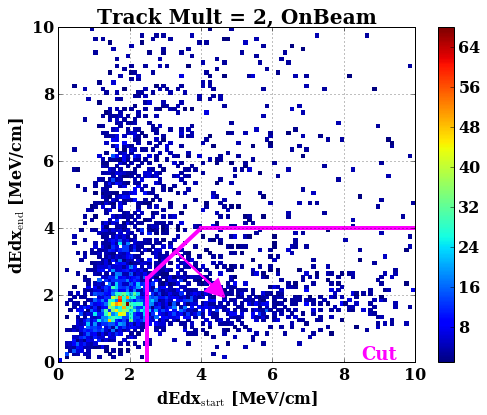

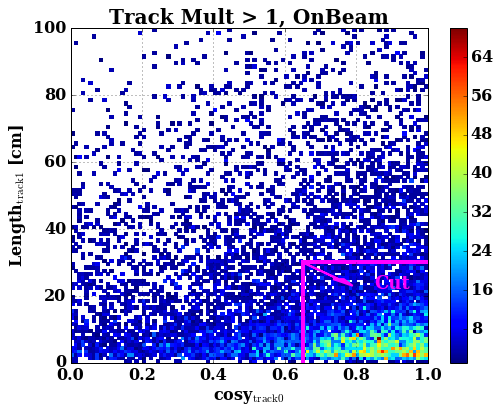

In [5]:
make2DHist("hSingleTrackLengthRatioVsdEdxRatio_0_",\
          "Projected Y Length [cm]", 'dEdx$_\mathrm{high}$ / dEdx$_\mathrm{low}$',\
           'mult1_dedxratio','projylen',\
          0,200,0,10,x00=25,x01=200,y00=1.5,y01=1.5,x10=25,x11=25,y10=0,y11=1.5,\
          a_v=[25,40,1.49,-1,0.3,7],t_v=[150,1])

make2DHist("hCosVsLen_0_",\
           "Track cos(y)","Track Length [cm]",\
           'mult1_length','cosy',\
          0,1,0,100,x00=0.4,x01=0.4,y00=15,y01=100,x10=0,x11=0.4,y10=15,y11=15,\
          a_v=[0.4,0.1,15,-5,0.05,2],t_v=[0.85,92])


make2DHist("hLongTrackdEdxStartEnd_0_",\
          "dEdx$_\mathrm{start}$ [MeV/cm]","dEdx$_\mathrm{end}$ [MeV/cm]",\
           'mult2_dedx','dedx',\
          0,10,0,10,"Mult = 2",x00=2.5,x01=2.5,y00=0,y01=2.5,x10=4,x11=10,y10=4,y11=4,\
          a_v=[3.3,1,3.3,-1,0.5,0.5],t_v=[8.5,0.1])


make2DHist("hCos0VsLen1_0_",\
          "cosy$_\mathrm{track0}$","Length$_\mathrm{track1}$ [cm]",'multgt1_len','cosy',\
          0,1,0,100,'Mult > 1',x00=0.65,x01=0.65,y00=0,y01=30,x10=0.65,x11=1,y10=30,y11=30,\
          a_v=[0.65,0.1,30,-5,0.03,2],t_v=[0.85,22])

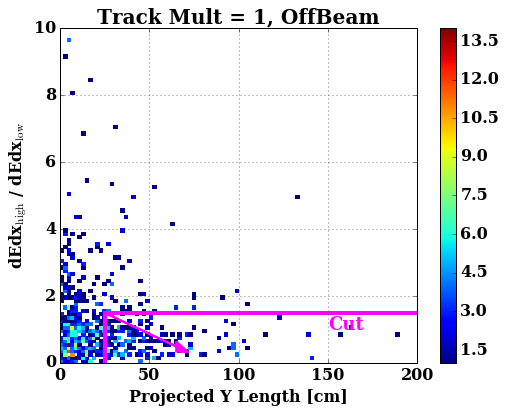

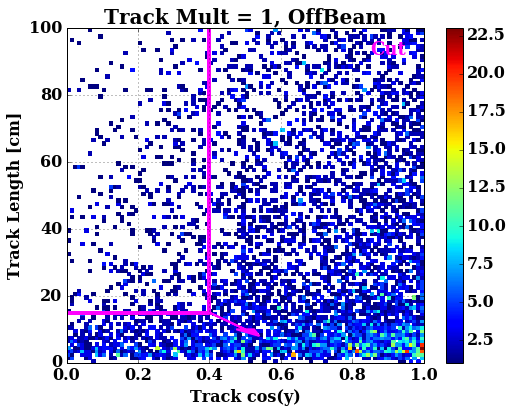

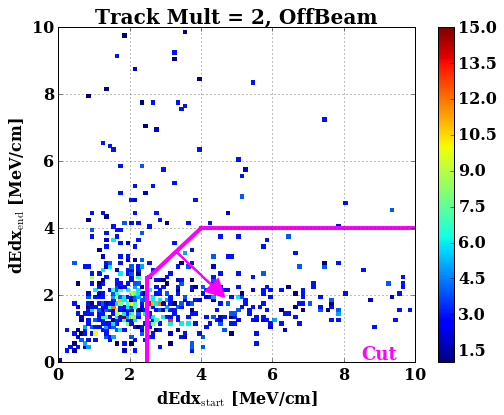

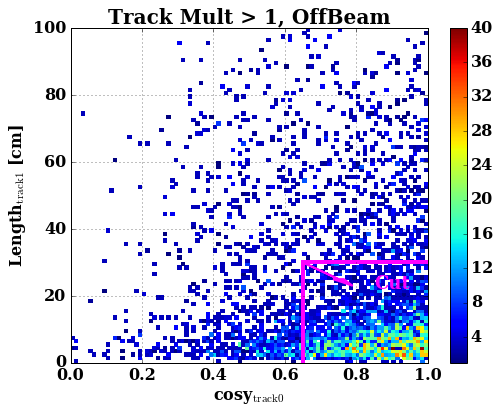

In [6]:
stage='sel2_data'
name_v = ['OffBeam']
label_v = ['OffBeam']
color_v = ['black'] 


make2DHist("hSingleTrackLengthRatioVsdEdxRatio_1_",\
          "Projected Y Length [cm]", 'dEdx$_\mathrm{high}$ / dEdx$_\mathrm{low}$',\
           'mult1_dedxratio','projylen',\
          0,200,0,10,x00=25,x01=200,y00=1.5,y01=1.5,x10=25,x11=25,y10=0,y11=1.5,\
          a_v=[25,40,1.49,-1,0.3,7],t_v=[150,1])

make2DHist("hCosVsLen_1_",\
           "Track cos(y)","Track Length [cm]",\
           'mult1_length','cosy',\
          0,1,0,100,x00=0.4,x01=0.4,y00=15,y01=100,x10=0,x11=0.4,y10=15,y11=15,\
          a_v=[0.4,0.1,15,-5,0.05,2],t_v=[0.85,92])


make2DHist("hLongTrackdEdxStartEnd_1_",\
          "dEdx$_\mathrm{start}$ [MeV/cm]","dEdx$_\mathrm{end}$ [MeV/cm]",\
           'mult2_dedx','dedx',\
          0,10,0,10,"Mult = 2",x00=2.5,x01=2.5,y00=0,y01=2.5,x10=4,x11=10,y10=4,y11=4,\
          a_v=[3.3,1,3.3,-1,0.5,0.5],t_v=[8.5,0.1])


make2DHist("hCos0VsLen1_1_",\
          "cosy$_\mathrm{track0}$","Length$_\mathrm{track1}$ [cm]",'multgt1_len','cosy',\
          0,1,0,100,'Mult > 1',x00=0.65,x01=0.65,y00=0,y01=30,x10=0.65,x11=1,y10=30,y11=30,\
          a_v=[0.65,0.1,30,-5,0.03,2],t_v=[0.85,22])

# Now do Data-MC comparisons


POTS :  0.489 3.38919899187
MC to OnBeam :  0.144281879339
Off to OnBeam:  1.223036308


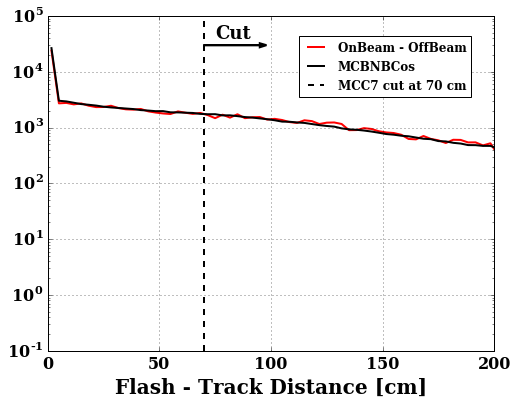

In [7]:
f_root = TFile("Files/SelectionII_ccpi0_dQdx_v9.root") 

#tot_on = 540769 #422452
#tot_off = 377489 #367110 
#dataPOT = 0.495 * (tot_on) / 567157 #547616  
#off_to_on = 1.23 * (400675./tot_off) * (tot_on/567157.)

dataPOT = 0.489
off_to_on = 1.223036308
tot_bnbcos = 335650 #60000 #267900 #147100 
int_per_1e20POT = 99035.2 
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

h0 = f_root.Get("hFlashTrackDist_0_0") # On Beam
h1 = f_root.Get("hFlashTrackDist_1_0") # Off Beam
h2 = f_root.Get("hFlashTrackDist_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

cut = 70

plt.figure(figsize=(8,6))
bin_width = bins[1]-bins[0]
err_on = np.sqrt(onbeam); err_off = np.sqrt(offbeam); err_mc = np.sqrt(bnbcos);
err_on_off = np.sqrt(err_on * err_on + err_off * err_off)
#plt.errorbar(bins,on_minus_off,xerr=bin_width/2,yerr=err_on_off,fmt='k.',label='OnBeam - OffBeam',markersize=2,lw=2)
#plt.errorbar(bins,bnbcos_sc,xerr=bin_width/2,yerr=err_mc,fmt='r.',label='MCBNBCos',markersize=2,lw=2)
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='o')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.axvline(cut,linestyle='--',color='k',lw=2,label='MCC7 cut at %.0f cm'%cut)
plt.grid(True)
plt.xlabel('Flash - Track Distance [cm]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(0.55,0.85))
plt.yscale('log')
ax = plt.axes()
ax.arrow(70, 30000,25, 0, head_width=5000, head_length=3, fc='k',ec='k',lw=2)
plt.text(75,40000, 'Cut',fontsize=18,weight='bold',color='k')

plt.savefig('Plots/CutJustify_sel2_datamc_flashtrkdist.png')

plt.xlim(0,200)
plt.savefig('Plots/CutJustify_sel2_datamc_flashtrkdist_zoom.png')


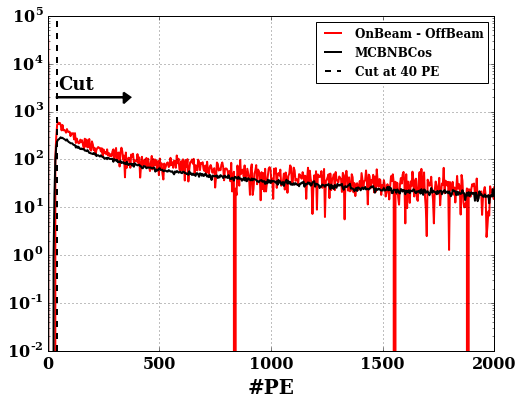

In [16]:
h0 = f_root.Get("hPEDist_0_0") # On Beam
h1 = f_root.Get("hPEDist_1_0") # Off Beam
h2 = f_root.Get("hPEDist_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on
    
cut = 40

plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='o')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.grid(True)
plt.axvline(cut,linestyle='--',color='k',lw=2,label='Cut at %.0f PE'%cut)
plt.xlim(0,500)
plt.legend(loc=0)#'center left', bbox_to_anchor=(0.55,0.85))
plt.xlabel('#PE',fontsize=20,weight='bold')
plt.yscale('log')
ax = plt.axes()
ax.arrow(40,2000,300, 0, head_width=1000, head_length=30, fc='k',ec='k',lw=2)
plt.text(45,3000, 'Cut',fontsize=18,weight='bold',color='k')
plt.savefig('Plots/CutJustify_sel2_datamc_numPE_zoom.png')

plt.xlim(0,2000)
plt.savefig('Plots/CutJustify_sel2_datamc_numPE.png')

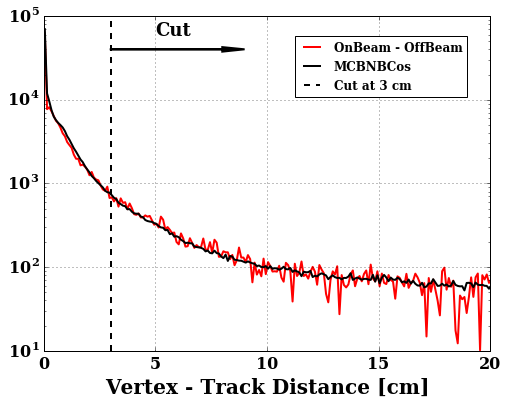

In [19]:
h0 = f_root.Get("hVtxTrackDist_0_0") # On Beam
h1 = f_root.Get("hVtxTrackDist_1_0") # Off Beam
h2 = f_root.Get("hVtxTrackDist_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on
    
cut = 3

plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='o')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.axvline(cut,linestyle='--',color='k',lw=2,label='Cut at %.0f cm'%cut)
plt.grid(True)
plt.xlim(0,20)
plt.xlabel('Vertex - Track Distance [cm]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(0.55,0.85))
plt.yscale('log')
ax = plt.axes()
ax.arrow(3,40000,5, 0, head_width=5000, head_length=1, fc='k',ec='k',lw=2)
plt.text(5,60000, 'Cut',fontsize=18,weight='bold',color='k')
plt.savefig('Plots/CutJustify_sel2_datamc_vtxtrkdist.png')

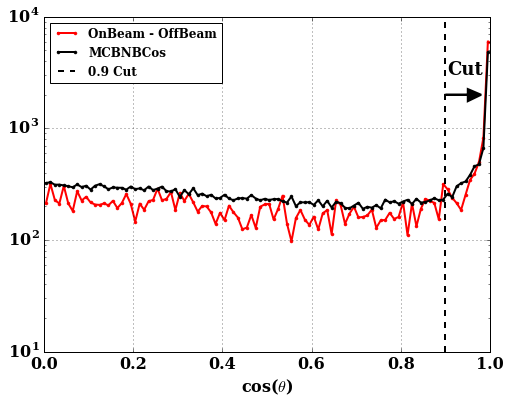

In [22]:
h0 = f_root.Get("hCos3_0_0") # On Beam
h1 = f_root.Get("hCos3_1_0") # Off Beam
h2 = f_root.Get("hCos3_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on
    
cut = 3

plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2,marker='.')
plt.axvline(0.9,lw=2,ls='--',c='k',label='0.9 Cut')
plt.grid(True)
plt.xlim(0,1)
ax = plt.axes()
ax.arrow(0.9,2000,0.05, 0, head_width=500, head_length=0.03, fc='k',ec='k',lw=2)
plt.text(0.905,3000, 'Cut',fontsize=18,weight='bold',color='k')

plt.yscale('log')
plt.xlabel('Vertex - Track Distance [cm]',fontsize=20,weight='bold')
plt.xlabel('cos($\\theta$)',fontsize=16,weight='bold')
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_cosangle_OnBeam.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
#plt.xlim(0,200)
#plt.savefig('Plots/CutJustify_sel2_datamc_vtxtrkdist_zoom.png')

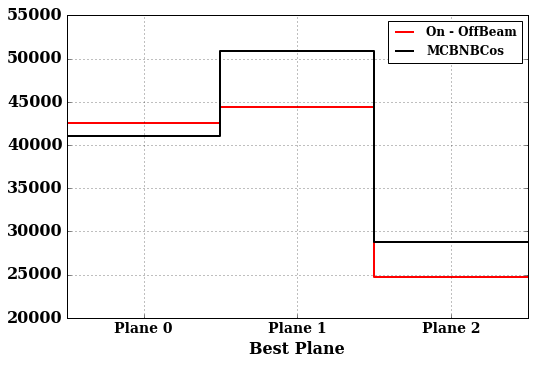

In [23]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.set_xticks([i +0.5 for i in xrange(0,3)]) 
x_label_v = ['Plane 0','Plane 1','Plane 2']

h0 = f_root.Get("hBestPlane0_0") # On Beam
h1 = f_root.Get("hBestPlane1_0") # Off Beam
h2 = f_root.Get("hBestPlane2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
bins = (edges[0][:-1] + edges[0][1:])/2
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

left, right = edges[0][:-1], edges[0][1:]
X = np.array([left,right]).T.flatten()
Y = np.array([on_minus_off,on_minus_off]).T.flatten()
Ymc = np.array([bnbcos_sc,bnbcos_sc]).T.flatten()

bin_width = bins[1]-bins[0]
err_on = np.sqrt(onbeam); err_off = np.sqrt(offbeam); err_mc = np.sqrt(bnbcos);
err_on_off = np.sqrt(err_on * err_on + err_off * err_off)
#plt.errorbar(bins,on_minus_off,xerr=bin_width/2,yerr=err_on_off,fmt='r.',markersize=2,lw=2)
#plt.errorbar(bins,bnbcos_sc,xerr=bin_width/2,yerr=err_mc,fmt='k.',markersize=2,lw=2)
plt.plot(X,Y,label='On - OffBeam',lw=2,color='r')
plt.plot(X,Ymc,label='MCBNBCos',lw=2,color='k')

ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(x_label_v,fontsize=14)#,weight='bold') #'CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
plt.xlabel('Best Plane',fontsize=16,weight='bold')
plt.grid(True)
lgd = plt.legend(loc=0) 
plt.savefig('Plots/CutJustify_sel2_datamc_bestplane.png') 

11977.0


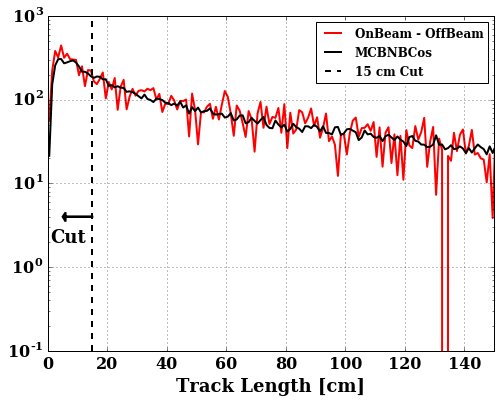

In [40]:
h0 = f_root.Get("hTrackLength1_0_0") # On Beam
h1 = f_root.Get("hTrackLength1_1_0") # Off Beam
h2 = f_root.Get("hTrackLength1_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)

print np.sum(offbeam)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

cut = 15
plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
plt.grid(True)
plt.yscale('log')
#plt.ylim(0,450)
plt.xlim(0,150)
ax = plt.axes()
ax.arrow(15,4,-9, 0, head_width=1, head_length=1, fc='k',ec='k',lw=2)
plt.text(1,2, 'Cut',fontsize=18,weight='bold',color='k')
plt.xlabel("Track Length [cm]",fontsize=18,weight='bold')
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_datamc_mult1_tracklen.png',bbox_extra_artists=(lgd,), bbox_inches='tight')



12474.0


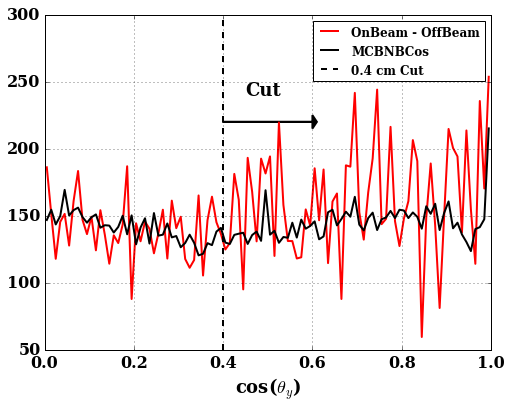

In [9]:
h0 = f_root.Get("hTrackCosyMult1_0_0") # On Beam
h1 = f_root.Get("hTrackCosyMult1_1_0") # Off Beam
h2 = f_root.Get("hTrackCosyMult1_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
print np.sum(offbeam)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on
#print np.sum(bnbcos_sc)

cut = 0.4
plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
plt.grid(True)
#plt.xlim(0,150)
plt.xlabel("cos($\\theta_y$)",fontsize=18,weight='bold')
ax = plt.axes()
ax.arrow(0.4,220,0.2, 0, head_width=10, head_length=.01, fc='k',ec='k',lw=2)
plt.text(0.45,240, 'Cut',fontsize=18,weight='bold',color='k')
#plt.ylim(0,450)

lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_datamc_mult1_dcosy.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

In [16]:
print np.sum(onbeam)

28576.0


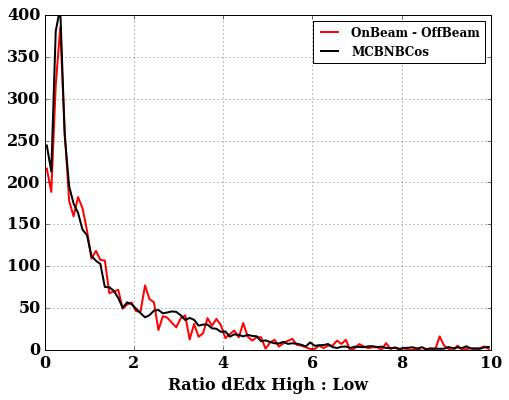

In [31]:
h0 = f_root.Get("hRatiodEdxHighLowMult1_0_0") # On Beam
h1 = f_root.Get("hRatiodEdxHighLowMult1_1_0") # Off Beam
h2 = f_root.Get("hRatiodEdxHighLowMult1_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
#plt.axvline(1.63,lw=2,ls='--',c='b',label='1.63 MeV')
plt.grid(True)
#plt.ylim(0,420)
plt.xlabel('Ratio dEdx High : Low',fontsize=16,weight='bold')
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))

plt.yscale('log')
plt.savefig('Plots/CutJustify_sel2_datamc_mult1_ratiodedx_log.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.yscale('linear')
plt.ylim(0,400)
plt.savefig('Plots/CutJustify_sel2_datamc_mult1_ratiodedx.png',bbox_extra_artists=(lgd,), bbox_inches='tight')


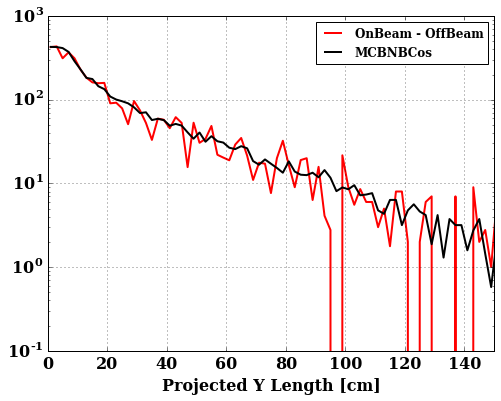

In [32]:
h0 = f_root.Get("hProjYLenMult1_0_0") # On Beam
h1 = f_root.Get("hProjYLenMult1_1_0") # Off Beam
h2 = f_root.Get("hProjYLenMult1_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
#plt.axvline(1.63,lw=2,ls='--',c='b',label='1.63 MeV')
plt.grid(True)
plt.yscale('log')
plt.xlim(0,150)
plt.xlabel('Projected Y Length [cm]',fontsize=16,weight='bold')
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_datamc_mult1_projylen.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

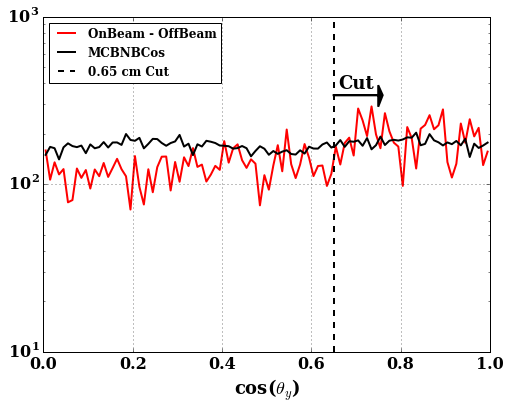

In [11]:
h0 = f_root.Get("hCosyTrack0Multgt1_0_0") # On Beam
h1 = f_root.Get("hCosyTrack0Multgt1_1_0") # Off Beam
h2 = f_root.Get("hCosyTrack0Multgt1_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

cut = 0.65
plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
plt.grid(True)
plt.yscale('log')
ax = plt.axes()
ax.arrow(0.65,340,0.1, 0, head_width=100, head_length=.01, fc='k',ec='k',lw=2)
plt.text(0.66,370, 'Cut',fontsize=18,weight='bold',color='k')

#plt.xlim(0,150)
plt.xlabel("cos($\\theta_y$)",fontsize=18,weight='bold')
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_datamc_multgt1_cosy0.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

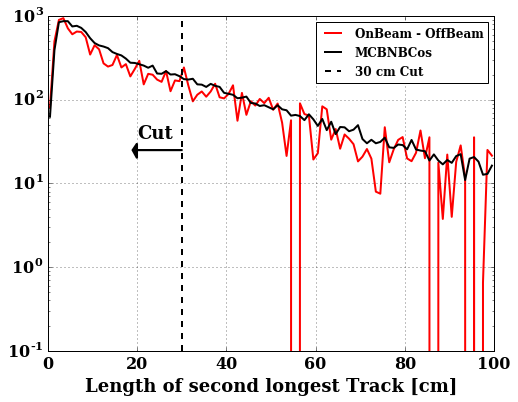

In [39]:
h0 = f_root.Get("hLenTrack1Multgt1_0_0") # On Beam
h1 = f_root.Get("hLenTrack1Multgt1_1_0") # Off Beam
h2 = f_root.Get("hLenTrack1Multgt1_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

cut= 30

plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
#plt.axvline(1.63,lw=2,ls='--',c='b',label='1.63 MeV')
plt.grid(True)
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
plt.yscale('log')
#plt.xlim(0,150)
plt.xlabel("Length of second longest Track [cm]",fontsize=18,weight='bold')
ax = plt.axes()
ax.arrow(30,25,-10, 0, head_width=10, head_length=1, fc='k',ec='k',lw=2)
plt.text(20,35, 'Cut',fontsize=18,weight='bold',color='k')
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_datamc_multgt1_tracklen1.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

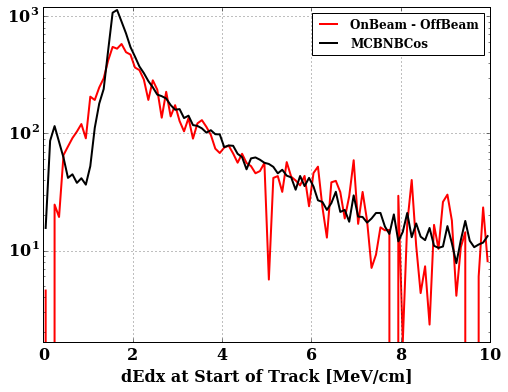

In [40]:
h0 = f_root.Get("hdEdxLongStart_0_0") # On Beam
h1 = f_root.Get("hdEdxLongStart_1_0") # Off Beam
h2 = f_root.Get("hdEdxLongStart_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
#plt.axvline(1.63,lw=2,ls='--',c='b',label='1.63 MeV')
plt.grid(True)
plt.xlim(0,10)
plt.yscale('log')
plt.ylim(0,1200)
plt.xlabel('dEdx at Start of Track [MeV/cm]',fontsize=16,weight='bold')
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_datamc_mult2_dedxStart.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

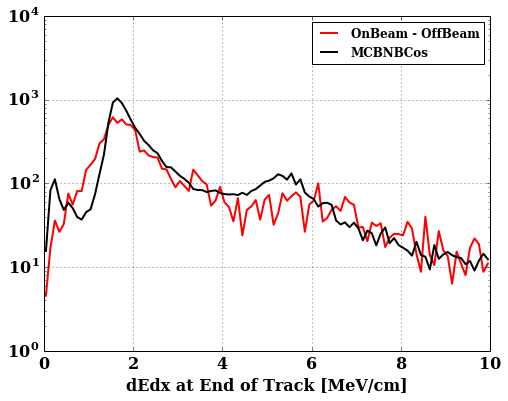

In [41]:
h0 = f_root.Get("hdEdxLongEnd_0_0") # On Beam
h1 = f_root.Get("hdEdxLongEnd_1_0") # Off Beam
h2 = f_root.Get("hdEdxLongEnd_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.grid(True)
plt.xlim(0,10)
plt.yscale('log')
plt.xlabel('dEdx at End of Track [MeV/cm]',fontsize=16,weight='bold')
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_datamc_mult2_dedxEnd.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

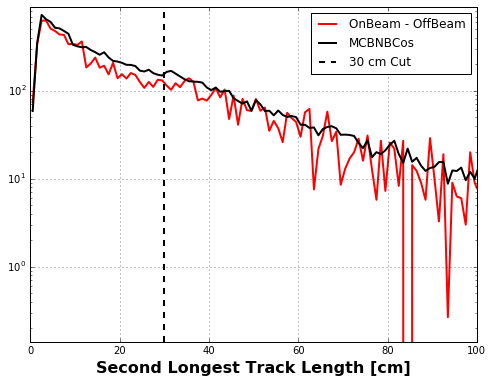

In [20]:
h0 = f_root.Get("hTrackLength3_0_0") # On Beam
h1 = f_root.Get("hTrackLength3_1_0") # Off Beam
h2 = f_root.Get("hTrackLength3_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

cut = 30
plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
plt.grid(True)
plt.xlim(0,100)
plt.yscale('log')
plt.ylim(0,900)
plt.xlabel('Length of Second Longest Track [cm]',fontsize=16,weight='bold')
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_datamc_mult2_trklen.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

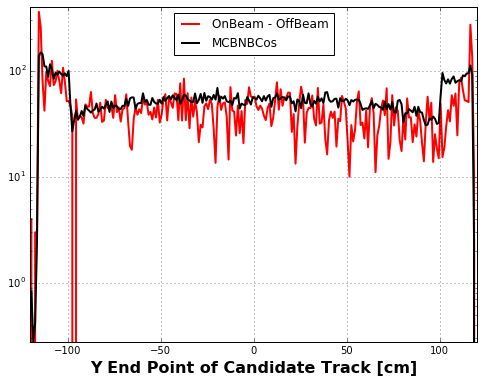

In [21]:
h0 = f_root.Get("hTrackEndy1_0_0") # On Beam
h1 = f_root.Get("hTrackEndy1_1_0") # Off Beam
h2 = f_root.Get("hTrackEndy1_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

cut = 30
plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.grid(True)
plt.yscale('log')
plt.ylim(0,400)
plt.xlim(-120,120)
plt.xlabel('Y End Point of Candidate Track [cm]',fontsize=16,weight='bold')
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))

plt.savefig('Plots/CutJustify_sel2_datamc_mult2_longesttrk_endy.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

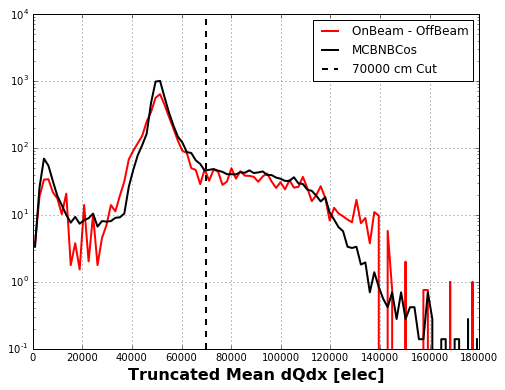

In [22]:
h0 = f_root.Get("hMIPdQdx_0_0") # On Beam
h1 = f_root.Get("hMIPdQdx_1_0") # Off Beam
h2 = f_root.Get("hMIPdQdx_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

cut = 70000
plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.grid(True)
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
plt.yscale('log')
plt.xlabel('Truncated Mean dQdx [elec]',fontsize=16,weight='bold')
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))

plt.savefig('Plots/CutJustify_sel2_datamc_allmult_MIPdqdx.png')

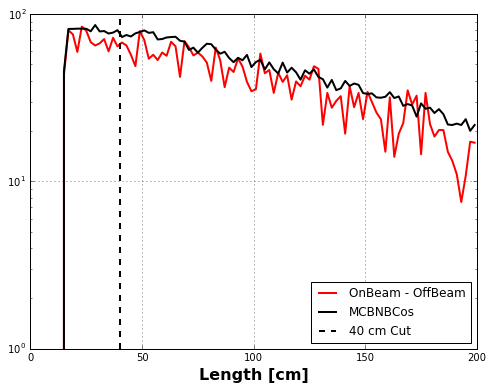

In [23]:
h0 = f_root.Get("hMIPLen_0_0") # On Beam
h1 = f_root.Get("hMIPLen_1_0") # Off Beam
h2 = f_root.Get("hMIPLen_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

cut = 40
plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.grid(True)
plt.yscale('log')
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))
plt.xlabel('Length [cm]',fontsize=16,weight='bold')

plt.savefig('Plots/CutJustify_sel2_datamc_allmult_MIPlen.png',bbox_extra_artists=(lgd,), bbox_inches='tight')